<a href="https://colab.research.google.com/github/kumarUjjawal/deep-learning-with-fastai/blob/master/vision/multi_label_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi Label Classification Using Fast ai Library**

In this task we'll use Pascal dataset which contains images of different objects/persons.

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/valid.json')]

In [4]:
import pandas as pd
df = pd.read_csv(path/'train.csv')

In [5]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=(224)))

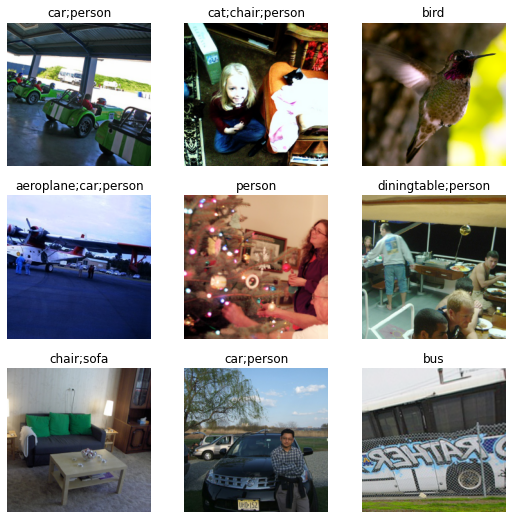

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.033113110810518265)

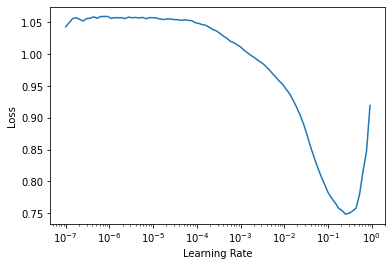

In [8]:
learn.lr_find()

In [9]:
learn.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.435091,0.113497,0.962649,00:44


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.195986,168.008698,0.875757,00:45
1,0.180516,0.143833,0.949940,00:45


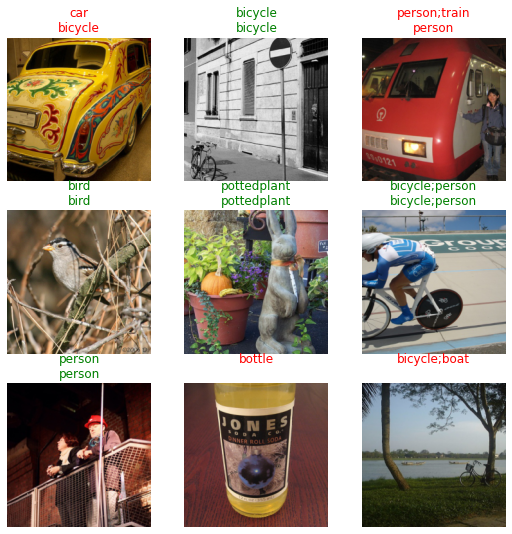

In [11]:
learn.show_results()

In [12]:
learn.predict(path/'train'/'000005.jpg')

((#1) ['chair'],
 tensor([False, False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False, False]),
 tensor([6.3923e-04, 4.8757e-03, 3.4951e-04, 4.3347e-04, 8.2225e-02, 4.7073e-03,
         9.9026e-03, 1.0111e-02, 8.3257e-01, 1.7486e-04, 1.8526e-01, 2.3070e-03,
         5.3445e-04, 5.2976e-04, 1.8564e-01, 4.2317e-01, 1.0877e-04, 3.0910e-01,
         2.6343e-03, 2.3988e-01]))

In [14]:
interp = Interpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,chair;diningtable;person,person,"tensor([1.6809e-12, 4.3295e-07, 6.5833e-07, 1.0523e-21, 8.8711e-06, 1.3498e-17,\n 3.2796e-09, 1.0968e-13, 5.7319e-10, 5.7134e-16, 1.2747e-08, 2.3951e-10,\n 1.1076e-27, 1.5575e-17, 9.9997e-01, 9.1061e-05, 2.2915e-12, 6.0434e-07,\n 1.3489e-21, 1.2610e-08])",1.9728962182998657
1,chair;person,person,"tensor([8.6643e-20, 4.4872e-11, 5.1631e-11, 4.6348e-37, 1.1723e-08, 2.5974e-30,\n 9.4077e-16, 7.8605e-22, 2.7393e-16, 5.2932e-26, 1.4993e-13, 4.2944e-17,\n 0.0000e+00, 6.7841e-29, 1.0000e+00, 7.0854e-08, 1.3368e-19, 8.5959e-11,\n 2.4434e-37, 1.0633e-14])",1.791683554649353
2,chair;diningtable;person,person,"tensor([1.0565e-10, 4.3108e-07, 7.3368e-06, 5.2243e-18, 1.7636e-05, 2.0000e-15,\n 6.9256e-08, 6.0018e-12, 9.5064e-09, 4.5390e-14, 5.6945e-08, 2.3060e-08,\n 1.6224e-22, 6.4244e-15, 9.9960e-01, 8.6996e-05, 3.3005e-11, 1.4614e-06,\n 6.3760e-18, 2.3453e-07])",1.7576502561569214
3,motorbike;person,person,"tensor([3.2352e-10, 2.3108e-06, 1.4209e-05, 1.0001e-16, 2.7802e-05, 7.3035e-14,\n 1.6577e-07, 6.2345e-11, 4.9204e-08, 6.1493e-13, 3.0121e-07, 4.3879e-08,\n 1.1782e-20, 1.1952e-13, 9.9989e-01, 2.6072e-04, 4.7815e-10, 3.6959e-06,\n 7.9665e-17, 3.2763e-07])",1.4877862930297852
4,bus;person,person,"tensor([6.7207e-10, 2.5863e-05, 2.3978e-05, 1.5364e-17, 2.0491e-04, 3.5190e-13,\n 1.2449e-07, 2.2961e-10, 1.5751e-07, 2.1526e-12, 2.6360e-06, 4.0660e-08,\n 2.5996e-21, 4.0507e-14, 9.9994e-01, 5.2248e-04, 1.4904e-09, 5.8792e-05,\n 4.0062e-17, 1.6002e-06])",1.4338165521621704
5,bus;person,person,"tensor([2.4300e-09, 7.9055e-06, 5.6554e-05, 1.7572e-16, 6.9872e-05, 1.0315e-12,\n 3.0922e-07, 1.6898e-10, 1.2945e-07, 2.6320e-12, 1.4146e-06, 7.9492e-08,\n 8.1731e-20, 1.6424e-13, 9.9988e-01, 3.0446e-04, 1.1580e-09, 1.2625e-05,\n 2.6847e-16, 2.5170e-06])",1.3800314664840698
6,chair;diningtable;person;pottedplant,person,"tensor([2.0307e-05, 1.4745e-02, 3.8155e-03, 4.7218e-07, 2.7312e-03, 1.5039e-05,\n 3.9312e-03, 1.6032e-05, 4.8295e-04, 1.3758e-06, 3.0868e-04, 1.9806e-04,\n 7.0913e-08, 1.7864e-06, 9.5681e-01, 1.4526e-02, 1.1191e-05, 1.5400e-03,\n 6.6290e-07, 1.4827e-03])",1.00117027759552
7,dog;person,person,"tensor([1.3469e-11, 1.5268e-06, 6.1391e-06, 3.1645e-21, 3.8762e-05, 2.2668e-16,\n 1.9331e-09, 1.2523e-12, 4.6063e-09, 1.5786e-14, 2.8977e-07, 1.2747e-08,\n 4.8235e-26, 7.2584e-17, 9.9999e-01, 1.9528e-04, 4.5121e-11, 1.0974e-05,\n 4.7397e-21, 4.5342e-08])",0.9089111685752869
8,bus;car;person,person,"tensor([1.7480e-05, 9.3066e-04, 1.4017e-03, 7.9853e-08, 1.2481e-03, 4.1860e-06,\n 3.9536e-03, 1.7803e-06, 1.1200e-04, 4.3965e-07, 9.7253e-05, 1.0970e-04,\n 3.3773e-09, 5.7657e-07, 9.5459e-01, 3.8841e-03, 2.7385e-06, 8.8176e-04,\n 2.4238e-07, 9.6009e-04])",0.8986509442329407


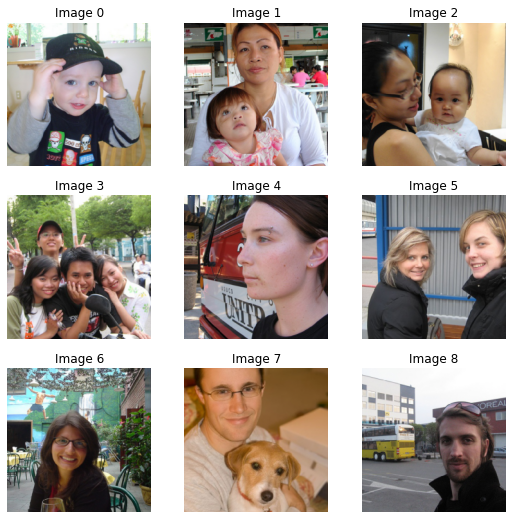

In [15]:
interp.plot_top_losses(9)

With DataBlock API

In [21]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter= ColSplitter('is_valid'),
                   get_x= ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y= ColReader("labels", label_delim=' '),
                   item_tfms= Resize(460),
                   batch_tfms= aug_transforms(size=224))

In [22]:
dls = pascal.dataloaders(df)

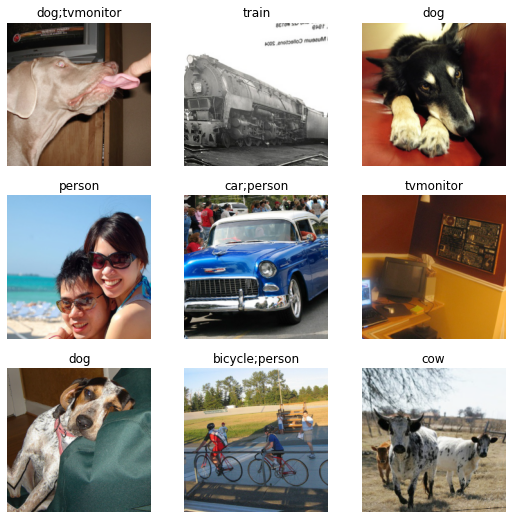

In [23]:
dls.show_batch()